In [1]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import numpy as np
import os
import matplotlib.widgets as mpwidgets

In [2]:
DATA_PARENT_DIR = '../Task1/brain/'
iterable_dir_list = sorted(os.listdir(DATA_PARENT_DIR), key=lambda x: x)
dataset_parent_dir = [os.path.join(DATA_PARENT_DIR, mri_path) for mri_path in iterable_dir_list]

In [3]:
%matplotlib widget

class Visualization:
    def __init__(self, image_parent_dir: str, img1_name: str = 'mr', img2_name: str = 'ct') -> None:
        self.img1 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[0], img1_name + '.nii.gz')))
        self.img2 = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(dataset_parent_dir[0], img2_name + '.nii.gz')))

    def update_opacity(self, value): 
        self.img2_plot.set_alpha(value)    
        self.fig.canvas.draw_idle()
    
    def update_slice(self, value):
        slice_idx = int(value)
        self.img1_plot.set_data(self.img1[:, slice_idx, :])
        self.img2_plot.set_data(self.img2[:, slice_idx, :])
        self.fig.canvas.draw_idle()

    def overlay_3d_plot(self) -> None:
        OPACITY = 0.5
        SLICE_NUMBER = self.img1.shape[1] // 2

        # PLOT
        self.fig, (ax0, ax1, ax2) = plt.subplots(3, 1, gridspec_kw={'height_ratios': [5, 1, 1]})
        self.img1_plot = ax0.imshow(self.img1[:,SLICE_NUMBER,:], cmap="gray")
        self.img2_plot = ax0.imshow(self.img1[:,SLICE_NUMBER,:], alpha=OPACITY, cmap="gray")

        slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
        slider0.on_changed(self.update_opacity)

        slider1 = mpwidgets.Slider(ax=ax2, label='slice', valmin=0, valmax=self.img1.shape[1]-1, valinit=SLICE_NUMBER)
        slider1.on_changed(self.update_slice)

        plt.show()

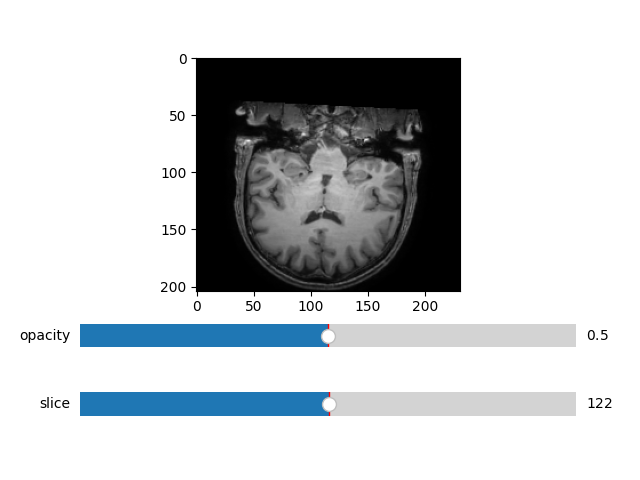

In [4]:
cat_a_sample = 1
cat_a_vis = Visualization(dataset_parent_dir[cat_a_sample])
cat_a_vis.overlay_3d_plot()